In [29]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[*********************100%%**********************]  1 of 1 completed


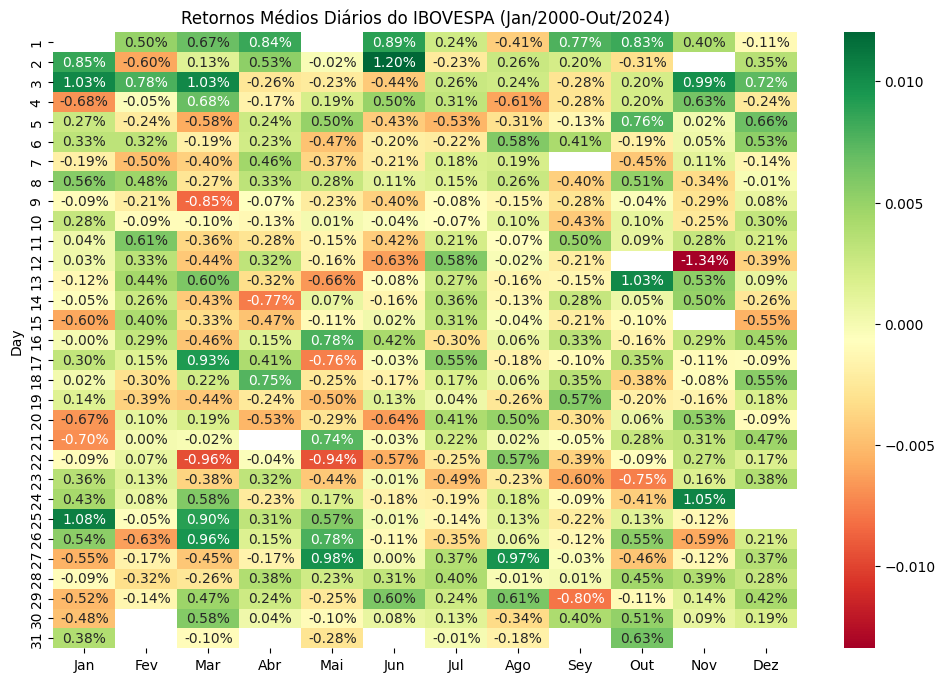

In [30]:
#download data
ibov_data = yf.download('^BVSP', start='2000-01-01')

#calcula os retornos diários
ibov_data['Daily_Return'] = ibov_data['Adj Close'].pct_change()

#remove valores nulos criados pela função pct_change
ibov_data.dropna(subset=['Daily_Return'], inplace=True)

#criando colunas de mês e dia para agrupamento
ibov_data['Month'] = ibov_data.index.month
ibov_data['Day'] = ibov_data.index.day

#calculando os retornos médios diários por mês e dia
avg_daily_returns = ibov_data.groupby(['Month', 'Day'])['Daily_Return'].mean().reset_index()

#criando um df pivot para o heatmap
heatmap_returns = avg_daily_returns.pivot(index="Day", columns="Month", values="Daily_Return")

#define os nomes dos meses
month_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Sey', 'Out', 'Nov', 'Dez']
heatmap_returns.columns = month_names

#criando um heatmap de retornos médios diários do IBOVESPA
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_returns, cmap='RdYlGn', annot=True, fmt=".2%")
plt.title('Retornos Médios Diários do IBOVESPA (Jan/2000-Out/2024)')
plt.show()

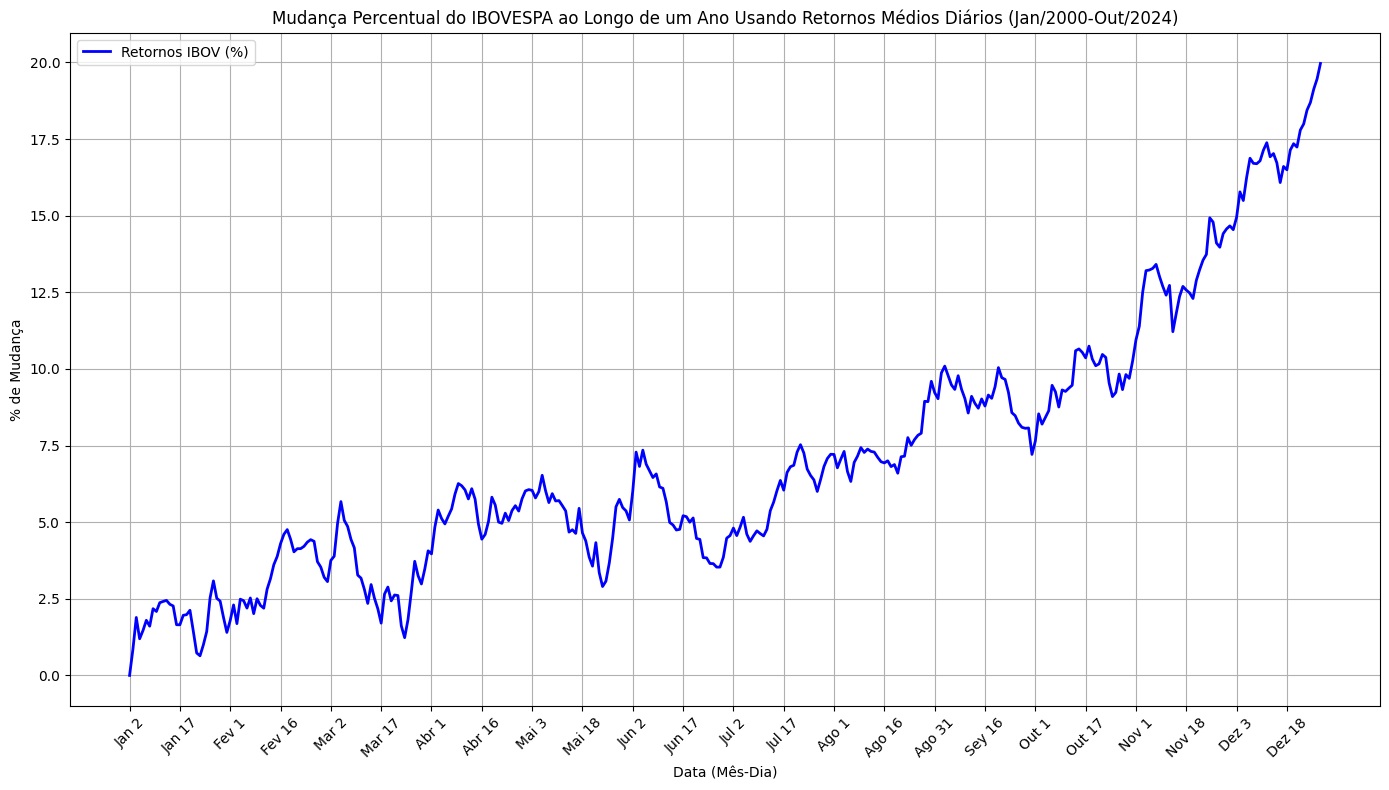

In [31]:
#função para simular o saldo anual com base nos retornos médios diários
def simular_saldo_anual(df, saldo_inicial=100000):
    saldos = [saldo_inicial] 
    datas = [] 

    #iterando sobre cada retorno médio e calculando o saldo diário
    for index, row in df.iterrows():
        dia = row.name[1]  #extrai o dia
        mes = row.name[0]  #extrai o mês
        retorno_diario = row['Daily_Return'] #retorno diário

        #adiciona o novo saldo calculado
        novo_saldo = saldos[-1] + (saldos[-1] * retorno_diario)
        saldos.append(novo_saldo)
        datas.append(f"{month_names[mes - 1]} {dia}")

    saldos = saldos[:-1]

    return saldos, datas

df_preparado = avg_daily_returns.set_index(['Month', 'Day'])

#calculando os saldos simulados e as datas associadas
saldos_simulados, datas_simuladas = simular_saldo_anual(df_preparado)

# Convertendo saldos para mudança percentual do saldo inicial
mudanca_percentual = [(saldo - 100000) / 100000 * 100 for saldo in saldos_simulados]

#plota a trajetória simulada de saldo em porcentagem
plt.figure(figsize=(14, 8))
plt.plot(datas_simuladas, mudanca_percentual, label='Retornos IBOV (%)', color='blue', linewidth=2)
plt.title('Mudança Percentual do IBOVESPA ao Longo de um Ano Usando Retornos Médios Diários (Jan/2000-Out/2024)')
plt.xlabel('Data (Mês-Dia)')
plt.ylabel('% de Mudança')
plt.xticks(datas_simuladas[::15], rotation=45) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


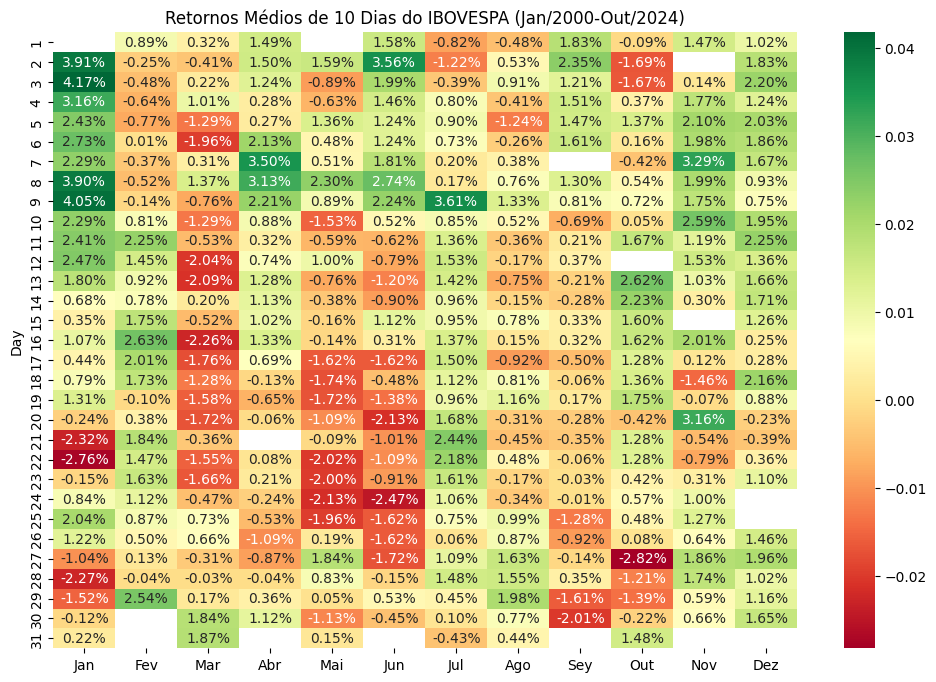

In [32]:
ibov_data_10d = yf.download('^BVSP', start='2000-01-01')

#calcula o retorno
ibov_data_10d['10_Day_Return'] = ibov_data_10d['Adj Close'] / ibov_data_10d['Adj Close'].shift(10) - 1

#remove o valores nulos
ibov_data_10d.dropna(subset=['10_Day_Return'], inplace=True)
ibov_data_10d['Month'] = ibov_data_10d.index.month
ibov_data_10d['Day'] = ibov_data_10d.index.day

#agrupa por mês e dia e calcula o retorno médio
avg_10d_returns = ibov_data_10d.groupby(['Month', 'Day'])['10_Day_Return'].mean().reset_index()

#df para o heatmap
heatmap_10d_returns = avg_10d_returns.pivot(index="Day", columns="Month", values="10_Day_Return")
heatmap_10d_returns.columns = month_names

#heatmap dos retornos médios de 10 diuas
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_10d_returns, cmap='RdYlGn', annot=True, fmt=".2%")
plt.title('Retornos Médios de 10 Dias do IBOVESPA (Jan/2000-Out/2024)')
plt.show()

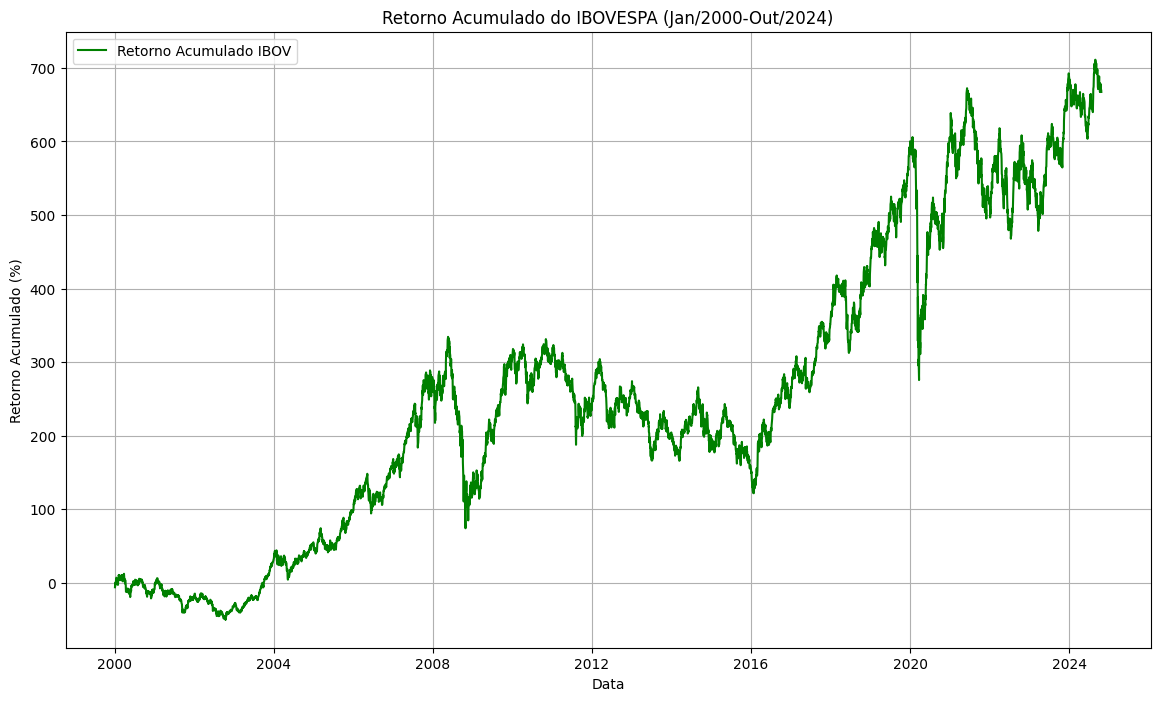

In [33]:
#retorno acumulado
ibov_data['Cumulative_Return'] = (1 + ibov_data['Daily_Return']).cumprod()

#ajusta para percentual
ibov_data['Cumulative_Return'] = (ibov_data['Cumulative_Return'] - 1) * 100

plt.figure(figsize=(14, 8))
plt.plot(ibov_data.index, ibov_data['Cumulative_Return'], label='Retorno Acumulado IBOV', color='green')
plt.title('Retorno Acumulado do IBOVESPA (Jan/2000-Out/2024)')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado (%)')
plt.legend()
plt.grid(True)
plt.show()

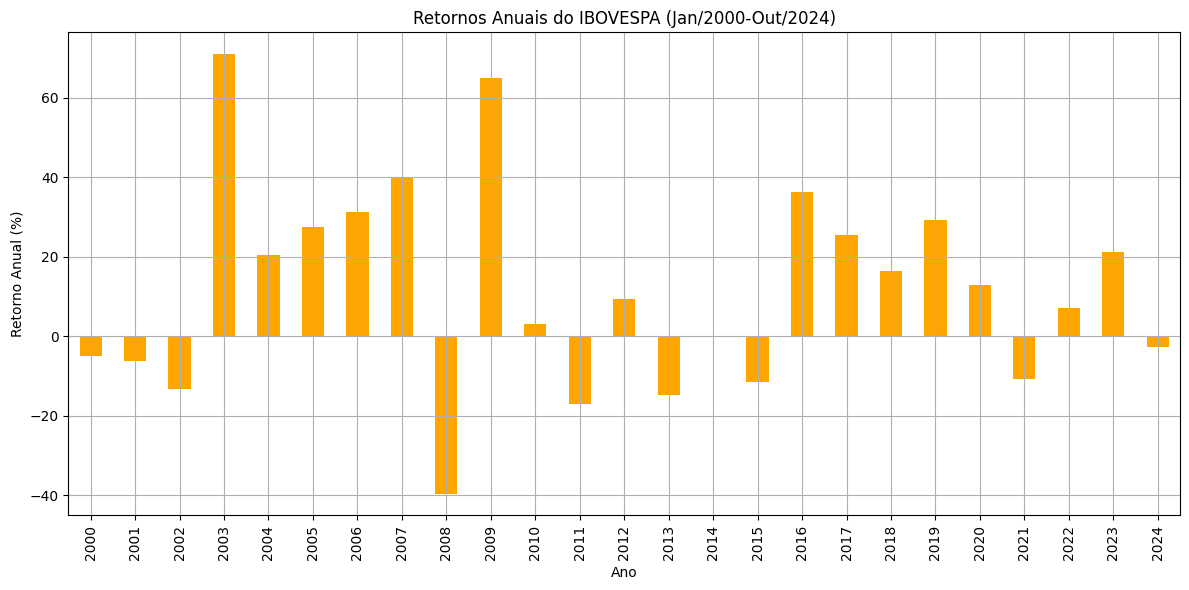

In [34]:
#plota os retornos anuais para comparação
ibov_data['Year'] = ibov_data.index.year
annual_returns = ibov_data.groupby('Year')['Daily_Return'].sum() * 100

plt.figure(figsize=(12, 6))
annual_returns.plot(kind='bar', color='orange')
plt.title('Retornos Anuais do IBOVESPA (Jan/2000-Out/2024)')
plt.xlabel('Ano')
plt.ylabel('Retorno Anual (%)')
plt.grid(True)
plt.tight_layout()
plt.show()